In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
CROX = pd.read_csv('CROX.csv', parse_dates=['Date'])
CROX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-02-08,15.000,16.250,14.070,14.275,14.275,23814000
1,2006-02-09,14.620,14.670,13.060,13.500,13.500,4463800
2,2006-02-10,13.500,13.770,13.010,13.275,13.275,1800400
3,2006-02-13,13.250,14.125,13.195,13.850,13.850,1701800
4,2006-02-14,13.875,14.235,13.875,13.900,13.900,2553800


In [3]:
df = pd.DataFrame(CROX, columns=['Open','High','Low','Close'])

In [4]:
df['log_open'] = np.log(df['Open'])
df['log_high'] = np.log(df['High'])
df['log_low'] = np.log(df['Low'])
df['log_close'] = np.log(df['Close'])

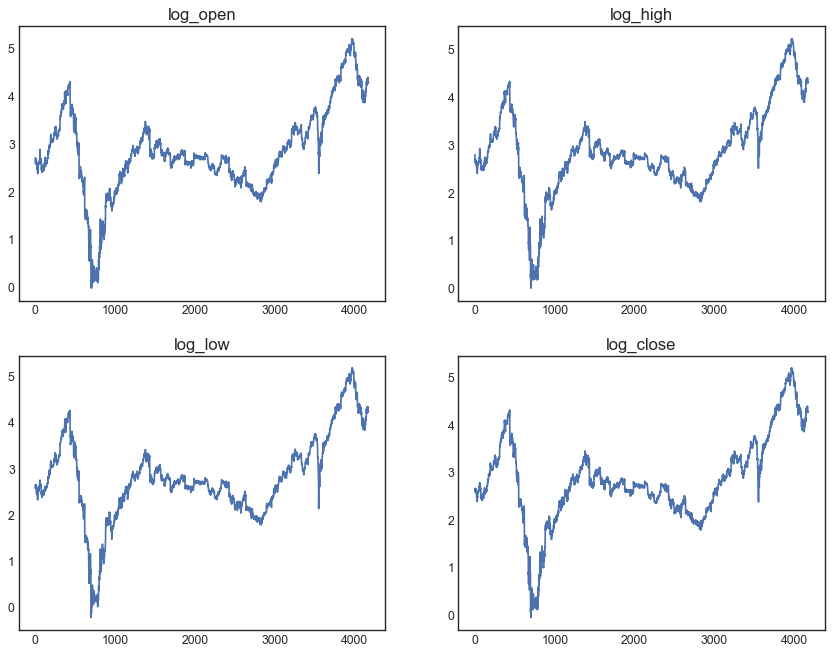

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(13,10), dpi= 80)
axes[0,0].plot(df['log_open'])
axes[0,0].set_title('log_open', fontsize=15)
axes[0,1].plot(df['log_high'])
axes[0,1].set_title('log_high', fontsize=15)
axes[1,0].plot(df['log_low'])
axes[1,0].set_title('log_low', fontsize=15)
axes[1,1].plot(df['log_close'])
axes[1,1].set_title('log_close', fontsize=15)
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

In [8]:
adfuller_test(df['log_open'].diff().dropna())

ADF Statistic: -10.0158645556701
p-value: 1.7296269893381028e-17
Critial Values:
   1%, -3.431930521551653
Critial Values:
   5%, -2.8622383876911655
Critial Values:
   10%, -2.567141758092371


In [9]:
adfuller_test(df['log_high'].diff().dropna())

ADF Statistic: -10.899968766999395
p-value: 1.1659769612542078e-19
Critial Values:
   1%, -3.4319286138291263
Critial Values:
   5%, -2.862237544946232
Critial Values:
   10%, -2.567141309453307


In [10]:
adfuller_test(df['log_low'].diff().dropna())

ADF Statistic: -10.283331094557088
p-value: 3.7300194297137066e-18
Critial Values:
   1%, -3.4319301396383657
Critial Values:
   5%, -2.8622382189793107
Critial Values:
   10%, -2.567141668277847


In [11]:
adfuller_test(df['log_close'].diff().dropna())

ADF Statistic: -10.309479456248413
p-value: 3.2134065489558685e-18
Critial Values:
   1%, -3.4319301396383657
Critial Values:
   5%, -2.8622382189793107
Critial Values:
   10%, -2.567141668277847


In [12]:
df['log_open_diff'] = df['log_open'].diff()
df['log_high_diff'] = df['log_high'].diff()
df['log_low_diff'] = df['log_low'].diff()
df['log_close_diff'] = df['log_close'].diff()

In [13]:
df = df.dropna()
df = df[['log_open_diff', 'log_high_diff', 'log_low_diff', 'log_close_diff']]
df

,log_open_diff,log_high_diff,log_low_diff,log_close_diff
1,-0.025660,-0.102288,-0.074491,-0.055820
2,-0.079701,-0.063312,-0.003836,-0.016807
3,-0.018692,0.025454,0.014120,0.042403
4,0.046091,0.007757,0.050251,0.003604
5,0.008969,-0.016646,0.001440,0.007168
...,...,...,...,...
4168,0.006740,-0.003389,-0.026520,-0.014532
4169,-0.023051,-0.026457,-0.003451,-0.001085
4170,-0.027605,-0.011866,-0.016734,-0.009269
4171,0.020300,0.003926,-0.008048,-0.028053


In [14]:
test_size = int(len(df)*0.1)
df_train = df.iloc[:-test_size]
df_test = df.iloc[-test_size:]
df_train

,log_open_diff,log_high_diff,log_low_diff,log_close_diff
1,-0.025660,-0.102288,-0.074491,-0.055820
2,-0.079701,-0.063312,-0.003836,-0.016807
3,-0.018692,0.025454,0.014120,0.042403
4,0.046091,0.007757,0.050251,0.003604
5,0.008969,-0.016646,0.001440,0.007168
...,...,...,...,...
3751,0.008907,0.002371,-0.017807,-0.017711
3752,-0.031693,0.023556,0.008371,0.042147
3753,0.057794,0.044921,0.035486,0.051745
3754,0.055074,0.037183,0.051648,-0.006528


In [15]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [16]:
mod = VARMAX(df_train[['log_open_diff', 'log_close_diff']], order=(2,2))
res = mod.fit()
print(res.summary())

/Users/zilinchen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/zilinchen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    Statespace Model Results                                   
Dep. Variable:     ['log_open_diff', 'log_close_diff']   No. Observations:                 3755
Model:                                      VARMA(2,2)   Log Likelihood               15468.982
                                           + intercept   AIC                         -30895.963
Date:                                 Mon, 19 Sep 2022   BIC                         -30765.115
Time:                                         21:40:47   HQIC                        -30849.432
Sample:                                              0                                         
                                                - 3755                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):           13.10, 13.52   Jarque-Bera (JB):   3376748.01, 16255.90
Prob(Q):                        0.00, 0.00   Prob(

In [17]:
n_periods = len(df_test)
index_of_fc = np.arange(len(df_train), len(df_train)+n_periods)

In [23]:
warnings.filterwarnings("ignore")

In [24]:
predicts = res.forecast(steps=n_periods)
predicts_close = pd.Series(predicts['log_close_diff'], index=index_of_fc)

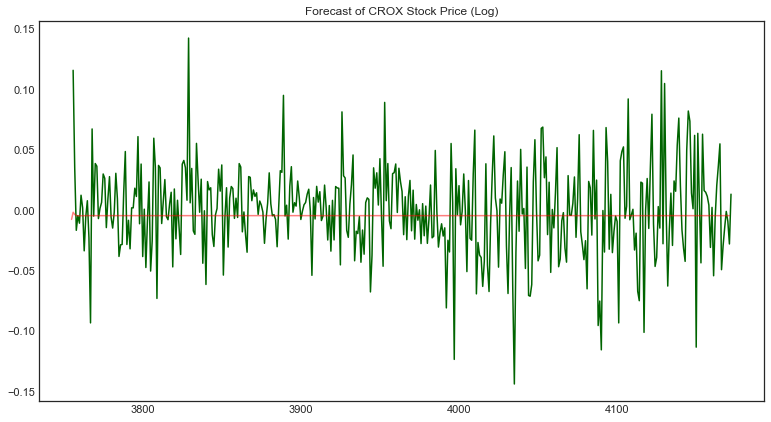

In [25]:
fig = plt.figure(figsize=(13,7))
plt.plot(df_test['log_close_diff'], color='darkgreen')
plt.plot(predicts_close, color='red', alpha=0.5)
plt.title("Forecast of CROX Stock Price (Log)")
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error

In [28]:
rms = mean_squared_error(df_test['log_close_diff'], predicts_close, squared=False)
rms

0.03791840456397777